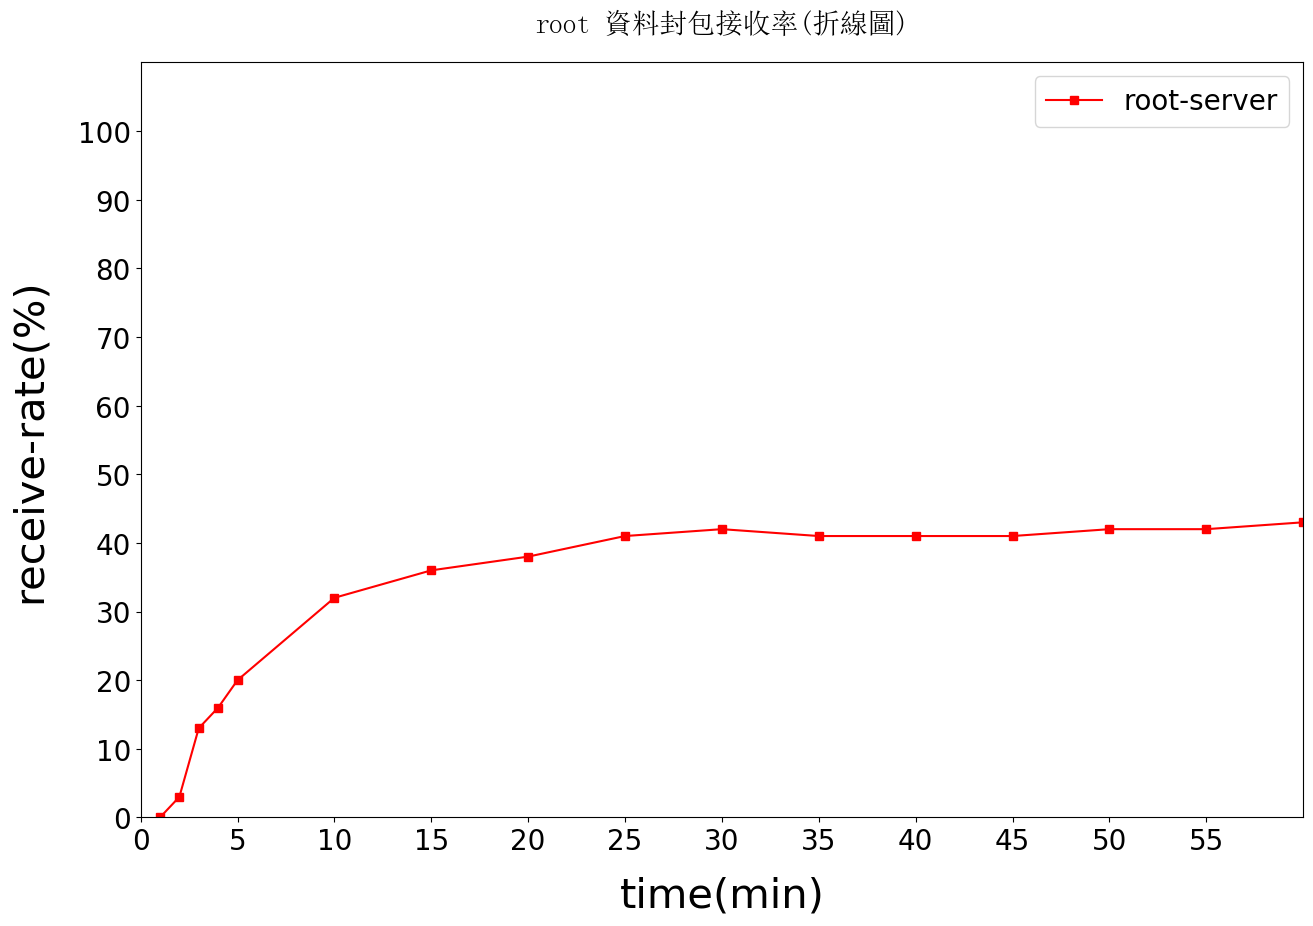

In [2]:
# Python 2D-绘图领域使用最广泛的套件。它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。
import matplotlib.pyplot as pt

# NumPy 提供了很多统计函数，用于从数组中查找最小元素，最大元素，百分位标准差和方差等
import numpy as np   

# 四捨五入用
import math

# 強制停止程式
import os


'''log analysis graph'''
# import字型管理套件
from matplotlib.font_manager import FontProperties
 
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
'''log analysis graph end'''

# 指定分析日誌檔(log)路徑
# s_logfile_path = '/Users/zukyun/Desktop/log analysis/non attack(three node) log.txt'

s_logfile_path = '/Users/zukyu/Desktop/log analysis/anti-blackhole-20-30s-5(simulation) log.txt'

#  f = open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
'''
with open 相當於執行:

try:
    f = open('/path/to/file', 'r')
    print(f.read())
finally:
    if f:
        f.close()
'''

with open(s_logfile_path, 'r', encoding='utf-8') as f0:
    txt_log = f0.readlines()

# Test to print log.txt content
#txt_log

# 每行log content 切割並list化  ['.\.\.','.\.\.'] -> [['','',''],['','','']]
# list_log [第幾行log][0 時間 1 ID 2 node output content]
list_log=[]
for item in txt_log:
    list_log.append(item.rstrip('\n').split('\t',1))
    #list_log.append(item)
    
#print(list_log[1000][0])


st1 = list_log[0][0]
'''-----------------------------------------------------'''
#函數 時間字串轉秒
def time2second(t):
    hour_exist = t.count(":")
    #print(hour_exist)
    
    if hour_exist == 1:
        m,s = t.strip().split(":")
        return int(m) * 60 + float(s)
    else:
        h,m,s = t.strip().split(":")
        return int(h) * 3600 + int(m) * 60 + float(s)

'''-----------------------------------------------------'''


log_end_time = list_log[-1][0]
#print(log_end_time)
log_end_time2second = int( math.floor(time2second(log_end_time)))

x_5min_cycle = math.floor(log_end_time2second/300)
#print(log_end_time2second)

x_time = []

if (x_5min_cycle >= 1):
    x_5min_cycle -= 1
    #x_time = [4,5]
    x_time = [1,2,3,4,5]
    #print(x_time)
else:
    print("log紀錄時間過短")
    os._exit() 
    
if x_5min_cycle < 1:
    print('Low than 10 minutes')
else:
    for num in range(2,x_5min_cycle+2):
        x_time.append(num*5)
        
#print(x_time)


def search_match(x_time):
    #print(x_time[0])
    # 分母
    keyword2 = "DATA send to"
    result2 = []
    count2 = 0
    match_list2 = []

    for query in range(len(list_log)):
        
        #print (list_log[query])
        if time2second(list_log[query][0]) <= (x_time*60):
            match = True
            if keyword2 not in list_log[query][1]:
                #print(list_log[query][1])
                match = False
        if match:
            #print(list_log[query][1])
            match_list2.append(list_log[query][1])
    result2.append(match_list2)
    count2 += 1

    
    # 分子 root receive how many packet
    keyword = "DATA sending reply"
    result = []
    count = 0
    match_list = []

    for query in range(len(list_log)):
        
        #print (list_log[query])
        if time2second(list_log[query][0]) <= (x_time*60):
            match = True
            
            if keyword not in list_log[query][1]:
                #print(list_log[query][1])
                match = False
            if match:
                #print(len(list_log[query][1]))
                match_list.append(list_log[query][1])
    result.append(match_list)
    count += 1
    return result2,result


# 使用接收率當做Y軸資料
rate = []
result = []
result2 = []
for num in range(0,len(x_time)):
    #print(x_time[num])
    result2.clear()
    result.clear()
    result2,result = search_match(x_time[num])
    
    calculate_value = int((len(result[0])/len(result2[0]))*100)
    if (calculate_value>100):
        calculate_value = 100
    rate.append(calculate_value)
#print(rate)



# 設定圖片大小為長15、寬10

pt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意

pt.plot(x_time,rate,'s-',color = 'r', label="root-server")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離

pt.title("root 資料封包接收率(折線圖)", fontproperties=font,fontsize=20, x=0.5, y=1.03)

# 设置刻度字体大小

my_x_ticks = np.arange(0, x_time[-1], 5)
my_y_ticks = np.arange( 0, 110, 10)
pt.xticks(my_x_ticks,fontsize=20)

pt.yticks(my_y_ticks,fontsize=20)


pt.axis([ 0, x_time[-1], 0, 110])


# 標示x軸(labelpad代表與圖片的距離)

pt.xlabel("time(min)", fontsize=30, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)

pt.ylabel("receive-rate(%)", fontsize=30, labelpad = 20)

# 顯示出線條標記位置

pt.legend(loc = "best", fontsize=20)

# 畫出圖片

pt.show()        

